In [41]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob

In [42]:
novels_data = pd.read_csv('set2.csv')

In [43]:
novels_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   novel_id                    2943 non-null   int64 
 1   url                         2943 non-null   object
 2   title                       2943 non-null   object
 3   associated_names            2943 non-null   object
 4   img_url                     2943 non-null   object
 5   showtype                    2935 non-null   object
 6   genres                      2943 non-null   object
 7   tags                        2943 non-null   object
 8   description                 2941 non-null   object
 9   related_series              2943 non-null   object
 10  recommendations             2943 non-null   object
 11  recommendation_lists        2943 non-null   object
 12  rating                      2943 non-null   object
 13  language                    2936 non-null   obje

In [44]:
novels_data.head()

,novel_id,url,title,associated_names,img_url,showtype,genres,tags,description,related_series,...,publishers,en_pubs,release_frequency,weekly_rank,monthly_rank,all_time_rank,monthly_rank_reading_list,all_time_rank_reading_list,total_reading_list_rank,chapters
0,41135,the-reason-why-raeliana-ended-up-at-the-dukes-...,The Reason Why Raeliana Ended Up at the Duke’s...,[그녀가 공작저로 가야 했던 사정],https://cdn.novelupdates.com/images/2021/03/Th...,Web Novel (KR),"[Drama, Fantasy, Romance, Shoujo]","[Adapted to Anime, Adapted to Manhwa, Aristocr...",Poisoned to death by her own betrothed?! Eunha...,"{'related_series': [], 'total': 0}",...,"[It Book, Kakaopage]",[TappyToon],Every 203 Day(s),#3184,#3714,#8313,#9733,#6506,1014,"{'chapters': [{'title': prologue, 'url': www.n..."
1,19194,ascending-do-not-disturb,"Ascending, Do Not Disturb","[Chớ quấy rầy phi thăng, Flying Up Without Dis...",https://cdn.novelupdates.com/images/2018/10/As...,Web Novel (CN),"[Adventure, Comedy, Fantasy, Josei, Romance, S...","[Adapted to Drama, Age Progression, Beautiful ...","You think too much, cultivation is not like th...","{'related_series': [], 'total': 0}",...,[jjwxc],[],Every 73.9 Day(s),#2326,#3094,#413,#264,#293,9809,"{'chapters': [{'title': c1, 'url': www.novelup..."
2,26142,delicious-food-got-me-famous-across-the-galaxy,Delicious Food Got Me Famous Across the Galaxy,"[Wǒ kào měishí huǒ biàn yínhéxì, ไหนๆทะลุมิติท...",https://cdn.novelupdates.com/images/2019/12/De...,Web Novel (CN),"[Comedy, Mecha, Romance, Sci-fi, Shounen Ai, S...","[Amnesia, Calm Protagonist, Carefree Protagoni...",Xie Yan was in an accident while acting. After...,"{'related_series': [], 'total': 0}",...,[jjwxc],[],Every 85 Day(s),#777,#1178,#1939,#1635,#1240,4990,"{'chapters': [{'title': c1, 'url': www.novelup..."
3,44797,the-villain-loaded-my-system,The Villain Loaded My System,[反派加载了我的系统[快穿]],https://cdn.novelupdates.com/images/2021/06/TH...,Web Novel (CN),"[Action, Adventure, Fantasy, Martial Arts, Rom...","[Amnesia, Ancient China, Artificial Intelligen...",Gu Xiyu led a task.\nHe needed to go to few sm...,"{'related_series': [], 'total': 0}",...,[jjwxc],[],Every 4.7 Day(s),#1037,#534,#2506,#330,#1984,3646,"{'chapters': [{'title': c1, 'url': www.novelup..."
4,31564,the-strongest-qi-refiner,The Strongest Qi Refiner,[史上最强炼气期 （又名：炼气五千年）],https://cdn.novelupdates.com/images/2020/06/63...,Web Novel (CN),"[Action, Adventure, Harem, Martial Arts, Schoo...","[Apathetic Protagonist, Average-looking Protag...","Fang Yu, who has practiced for nearly five tho...","{'related_series': [], 'total': 0}",...,[Qidian],[],Every 45.1 Day(s),#2000,#6230,#6250,#14343,#9934,455,"{'chapters': [{'title': v1c1, 'url': www.novel..."


In [45]:
novels_data['novel_id'] = pd.to_numeric(novels_data['novel_id'], errors='coerce')

In [46]:
novels_data = novels_data.reset_index()

In [47]:
novels_data.head()

,index,novel_id,url,title,associated_names,img_url,showtype,genres,tags,description,...,publishers,en_pubs,release_frequency,weekly_rank,monthly_rank,all_time_rank,monthly_rank_reading_list,all_time_rank_reading_list,total_reading_list_rank,chapters
0,0,41135,the-reason-why-raeliana-ended-up-at-the-dukes-...,The Reason Why Raeliana Ended Up at the Duke’s...,[그녀가 공작저로 가야 했던 사정],https://cdn.novelupdates.com/images/2021/03/Th...,Web Novel (KR),"[Drama, Fantasy, Romance, Shoujo]","[Adapted to Anime, Adapted to Manhwa, Aristocr...",Poisoned to death by her own betrothed?! Eunha...,...,"[It Book, Kakaopage]",[TappyToon],Every 203 Day(s),#3184,#3714,#8313,#9733,#6506,1014,"{'chapters': [{'title': prologue, 'url': www.n..."
1,1,19194,ascending-do-not-disturb,"Ascending, Do Not Disturb","[Chớ quấy rầy phi thăng, Flying Up Without Dis...",https://cdn.novelupdates.com/images/2018/10/As...,Web Novel (CN),"[Adventure, Comedy, Fantasy, Josei, Romance, S...","[Adapted to Drama, Age Progression, Beautiful ...","You think too much, cultivation is not like th...",...,[jjwxc],[],Every 73.9 Day(s),#2326,#3094,#413,#264,#293,9809,"{'chapters': [{'title': c1, 'url': www.novelup..."
2,2,26142,delicious-food-got-me-famous-across-the-galaxy,Delicious Food Got Me Famous Across the Galaxy,"[Wǒ kào měishí huǒ biàn yínhéxì, ไหนๆทะลุมิติท...",https://cdn.novelupdates.com/images/2019/12/De...,Web Novel (CN),"[Comedy, Mecha, Romance, Sci-fi, Shounen Ai, S...","[Amnesia, Calm Protagonist, Carefree Protagoni...",Xie Yan was in an accident while acting. After...,...,[jjwxc],[],Every 85 Day(s),#777,#1178,#1939,#1635,#1240,4990,"{'chapters': [{'title': c1, 'url': www.novelup..."
3,3,44797,the-villain-loaded-my-system,The Villain Loaded My System,[反派加载了我的系统[快穿]],https://cdn.novelupdates.com/images/2021/06/TH...,Web Novel (CN),"[Action, Adventure, Fantasy, Martial Arts, Rom...","[Amnesia, Ancient China, Artificial Intelligen...",Gu Xiyu led a task.\nHe needed to go to few sm...,...,[jjwxc],[],Every 4.7 Day(s),#1037,#534,#2506,#330,#1984,3646,"{'chapters': [{'title': c1, 'url': www.novelup..."
4,4,31564,the-strongest-qi-refiner,The Strongest Qi Refiner,[史上最强炼气期 （又名：炼气五千年）],https://cdn.novelupdates.com/images/2020/06/63...,Web Novel (CN),"[Action, Adventure, Harem, Martial Arts, Schoo...","[Apathetic Protagonist, Average-looking Protag...","Fang Yu, who has practiced for nearly five tho...",...,[Qidian],[],Every 45.1 Day(s),#2000,#6230,#6250,#14343,#9934,455,"{'chapters': [{'title': v1c1, 'url': www.novel..."


In [48]:
novels_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   index                       2943 non-null   int64 
 1   novel_id                    2943 non-null   int64 
 2   url                         2943 non-null   object
 3   title                       2943 non-null   object
 4   associated_names            2943 non-null   object
 5   img_url                     2943 non-null   object
 6   showtype                    2935 non-null   object
 7   genres                      2943 non-null   object
 8   tags                        2943 non-null   object
 9   description                 2941 non-null   object
 10  related_series              2943 non-null   object
 11  recommendations             2943 non-null   object
 12  recommendation_lists        2943 non-null   object
 13  rating                      2943 non-null   obje

In [49]:
novels_data.shape

(2943, 31)

In [50]:
selected_features = ['title','genres','tags','related_series','recommendations','recommendation_lists','authors','publishers']
print(selected_features)

['title', 'genres', 'tags', 'related_series', 'recommendations', 'recommendation_lists', 'authors', 'publishers']


In [51]:
for feature in selected_features:
  novels_data[feature] = novels_data[feature].fillna('')

In [52]:
combined_features= novels_data['title']+' '+novels_data['genres']+' '+novels_data['tags']+' '+novels_data['related_series']+' '+novels_data['recommendations']+' '+novels_data['recommendation_lists']+' '+novels_data['authors']+' '+novels_data['publishers']

In [53]:
print(combined_features)

0       The Reason Why Raeliana Ended Up at the Duke’s...
1       Ascending, Do Not Disturb [Adventure, Comedy, ...
2       Delicious Food Got Me Famous Across the Galaxy...
3       The Villain Loaded My System [Action, Adventur...
4       The Strongest Qi Refiner [Action, Adventure, H...
                              ...                        
2938    Running Away Hand in Hand with the Second Fema...
2939    The Paranoid Villain’s Little Fairy [Drama, Fa...
2940    I am the Monarch [Action, Fantasy, Seinen] [Ar...
2941    The Female Supporting Character is Obsessed wi...
2942    Beast’s Flower [Drama, Mystery, Psychological,...
Length: 2943, dtype: object


In [54]:
vectorizer = TfidfVectorizer()

In [55]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [56]:
print(feature_vectors)

  (0, 8930)	0.07435979922650075
  (0, 5267)	0.08273761174954088
  (0, 8681)	0.05854157697160964
  (0, 17112)	0.13293512777570113
  (0, 10062)	0.13293512777570113
  (0, 3808)	0.11640728985388676
  (0, 6892)	0.08971346903375968
  (0, 4398)	0.0869317296538047
  (0, 3843)	0.11865741158302108
  (0, 7291)	0.07825076149524839
  (0, 14264)	0.09936092234553344
  (0, 13620)	0.08519298427345898
  (0, 14611)	0.1069772702933114
  (0, 3866)	0.12125498648599145
  (0, 11723)	0.0986118709435144
  (0, 14265)	0.07938211795925737
  (0, 4079)	0.11865741158302108
  (0, 11662)	0.03731533610833848
  (0, 7871)	0.0965459136913647
  (0, 9257)	0.06603220757018483
  (0, 4154)	0.12125498648599145
  (0, 14284)	0.10049034616536161
  (0, 6778)	0.0930470072744674
  (0, 10672)	0.1197064911307203
  (0, 8)	0.16326447937678337
  :	:
  (2942, 14284)	0.17123143883514794
  (2942, 9542)	0.028713213419447804
  (2942, 5892)	0.1634069925832788
  (2942, 10674)	0.1635190222940726
  (2942, 14630)	0.1635190222940726
  (2942, 8289)	0.

In [57]:
similarity = cosine_similarity(feature_vectors)

In [58]:
print(similarity)

[[1.         0.22871044 0.21927034 ... 0.25365232 0.19741986 0.23762889]
 [0.22871044 1.         0.23959393 ... 0.28982346 0.20772576 0.19356116]
 [0.21927034 0.23959393 1.         ... 0.26072239 0.21529121 0.18135985]
 ...
 [0.25365232 0.28982346 0.26072239 ... 1.         0.24230591 0.20462517]
 [0.19741986 0.20772576 0.21529121 ... 0.24230591 1.         0.17518221]
 [0.23762889 0.19356116 0.18135985 ... 0.20462517 0.17518221 1.        ]]


In [59]:
print(similarity.shape)

(2943, 2943)


In [60]:
novels_data.dropna(subset=['description'], inplace=True)

In [61]:
novels_data.shape

(2941, 31)

In [62]:
def get_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

novels_data['sentiment'] = novels_data['description'].apply(get_sentiment)

In [63]:
novels_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2941 entries, 0 to 2942
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       2941 non-null   int64  
 1   novel_id                    2941 non-null   int64  
 2   url                         2941 non-null   object 
 3   title                       2941 non-null   object 
 4   associated_names            2941 non-null   object 
 5   img_url                     2941 non-null   object 
 6   showtype                    2933 non-null   object 
 7   genres                      2941 non-null   object 
 8   tags                        2941 non-null   object 
 9   description                 2941 non-null   object 
 10  related_series              2941 non-null   object 
 11  recommendations             2941 non-null   object 
 12  recommendation_lists        2941 non-null   object 
 13  rating                      2941 

In [64]:
novels_data.head()

,index,novel_id,url,title,associated_names,img_url,showtype,genres,tags,description,...,en_pubs,release_frequency,weekly_rank,monthly_rank,all_time_rank,monthly_rank_reading_list,all_time_rank_reading_list,total_reading_list_rank,chapters,sentiment
0,0,41135,the-reason-why-raeliana-ended-up-at-the-dukes-...,The Reason Why Raeliana Ended Up at the Duke’s...,[그녀가 공작저로 가야 했던 사정],https://cdn.novelupdates.com/images/2021/03/Th...,Web Novel (KR),"[Drama, Fantasy, Romance, Shoujo]","[Adapted to Anime, Adapted to Manhwa, Aristocr...",Poisoned to death by her own betrothed?! Eunha...,...,[TappyToon],Every 203 Day(s),#3184,#3714,#8313,#9733,#6506,1014,"{'chapters': [{'title': prologue, 'url': www.n...",-0.028571
1,1,19194,ascending-do-not-disturb,"Ascending, Do Not Disturb","[Chớ quấy rầy phi thăng, Flying Up Without Dis...",https://cdn.novelupdates.com/images/2018/10/As...,Web Novel (CN),"[Adventure, Comedy, Fantasy, Josei, Romance, S...","[Adapted to Drama, Age Progression, Beautiful ...","You think too much, cultivation is not like th...",...,[],Every 73.9 Day(s),#2326,#3094,#413,#264,#293,9809,"{'chapters': [{'title': c1, 'url': www.novelup...",0.110000
2,2,26142,delicious-food-got-me-famous-across-the-galaxy,Delicious Food Got Me Famous Across the Galaxy,"[Wǒ kào měishí huǒ biàn yínhéxì, ไหนๆทะลุมิติท...",https://cdn.novelupdates.com/images/2019/12/De...,Web Novel (CN),"[Comedy, Mecha, Romance, Sci-fi, Shounen Ai, S...","[Amnesia, Calm Protagonist, Carefree Protagoni...",Xie Yan was in an accident while acting. After...,...,[],Every 85 Day(s),#777,#1178,#1939,#1635,#1240,4990,"{'chapters': [{'title': c1, 'url': www.novelup...",-0.023438
3,3,44797,the-villain-loaded-my-system,The Villain Loaded My System,[反派加载了我的系统[快穿]],https://cdn.novelupdates.com/images/2021/06/TH...,Web Novel (CN),"[Action, Adventure, Fantasy, Martial Arts, Rom...","[Amnesia, Ancient China, Artificial Intelligen...",Gu Xiyu led a task.\nHe needed to go to few sm...,...,[],Every 4.7 Day(s),#1037,#534,#2506,#330,#1984,3646,"{'chapters': [{'title': c1, 'url': www.novelup...",0.081988
4,4,31564,the-strongest-qi-refiner,The Strongest Qi Refiner,[史上最强炼气期 （又名：炼气五千年）],https://cdn.novelupdates.com/images/2020/06/63...,Web Novel (CN),"[Action, Adventure, Harem, Martial Arts, Schoo...","[Apathetic Protagonist, Average-looking Protag...","Fang Yu, who has practiced for nearly five tho...",...,[],Every 45.1 Day(s),#2000,#6230,#6250,#14343,#9934,455,"{'chapters': [{'title': v1c1, 'url': www.novel...",-0.068750


In [65]:
print(novels_data[['index','novel_id','title','description', 'sentiment']])

      index  novel_id                                              title  \
0         0     41135  The Reason Why Raeliana Ended Up at the Duke’s...   
1         1     19194                          Ascending, Do Not Disturb   
2         2     26142     Delicious Food Got Me Famous Across the Galaxy   
3         3     44797                       The Villain Loaded My System   
4         4     31564                           The Strongest Qi Refiner   
...     ...       ...                                                ...   
2938   2938     39209  Running Away Hand in Hand with the Second Fema...   
2939   2939     55749                The Paranoid Villain’s Little Fairy   
2940   2940      6775                                   I am the Monarch   
2941   2941     42268  The Female Supporting Character is Obsessed wi...   
2942   2942     45639                                     Beast’s Flower   

                                            description  sentiment  
0     Poisoned to 

In [74]:
novel_name = input(' Enter your favourite novel name : ')

list_of_all_titles = novels_data['title'].tolist()

find_close_match = difflib.get_close_matches(novel_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_novel = novels_data[novels_data.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_novel]))

sorted_similar_novels = sorted(similarity_score, key = lambda x:x[1], reverse = True)

print('Novels suggested for you : \n')

i = 1

for novel in sorted_similar_novels:
  try:
    index = novel[0]
    title_from_index = novels_data[novels_data.index==index]['title'].values[0]
    sentiment_from_index = novels_data[novels_data.index==index]['sentiment'].values[0]

    sentiment_interpretation = "Unknown"

    if sentiment_from_index > 0:
        sentiment_interpretation = "Positive"
    elif sentiment_from_index < 0:
        sentiment_interpretation = "Negative"
    else:
        sentiment_interpretation = "Neutral"

    if (i<30):
      print(i, '.',title_from_index, ' - Sentimental Analysis : "',sentiment_interpretation,'"')
      i+=1
  except:
    pass

# Assuming sorted_similar_novels is the list of recommended novels
top_n_recommendations = [novels_data['title'].iloc[novel[0]] for novel in sorted_similar_novels[:30]]

# Calculate precision
intersection = set(novels_data['recommendation_lists']) & set(top_n_recommendations)
precision = len(intersection) / len(top_n_recommendations)
print("Precision:", precision)

 Enter your favourite novel name : Villainess
Novels suggested for you : 

Precision: 0.0
1 . Villainess VS Zombies  - Sentimental Analysis : " Positive "
2 . I Reincarnated as a Noble Girl Villainess But Why Did It Turn Out This Way? (LN)  - Sentimental Analysis : " Negative "
3 . Transmigrated as the Domesticated Rabbit of the Sick and Frail Villain in the Apocalypse  - Sentimental Analysis : " Positive "
4 . The Kingdom of Everlasting Night and the Last Ball  - Sentimental Analysis : " Positive "
5 . Gomen ne, Onii-sama  - Sentimental Analysis : " Positive "
6 . Common Sense of a Duke’s Daughter  - Sentimental Analysis : " Negative "
7 . Beware of the Villainess!  - Sentimental Analysis : " Positive "
8 . Reincarnated into an Otome Game? Who Cares! I’m Too Busy Mastering Magic!  - Sentimental Analysis : " Positive "
9 . The Daughter of the Albert House Wishes for Ruin  - Sentimental Analysis : " Negative "
10 . Mr. Zhou Doesn’t Want to Work Hard Anymore!  - Sentimental Analysis : " 

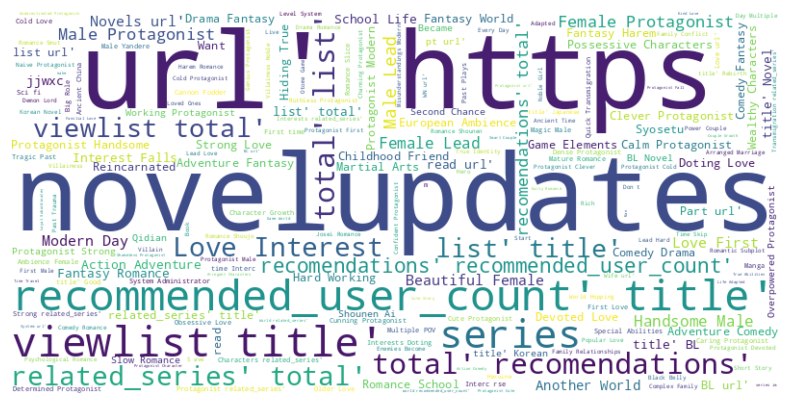

In [67]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_combined = ' '.join(novels_data['title']+' '+novels_data['genres']+' '+novels_data['tags']+' '+novels_data['related_series']+' '+novels_data['recommendations']+' '+novels_data['recommendation_lists']+' '+novels_data['authors']+' '+novels_data['publishers'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

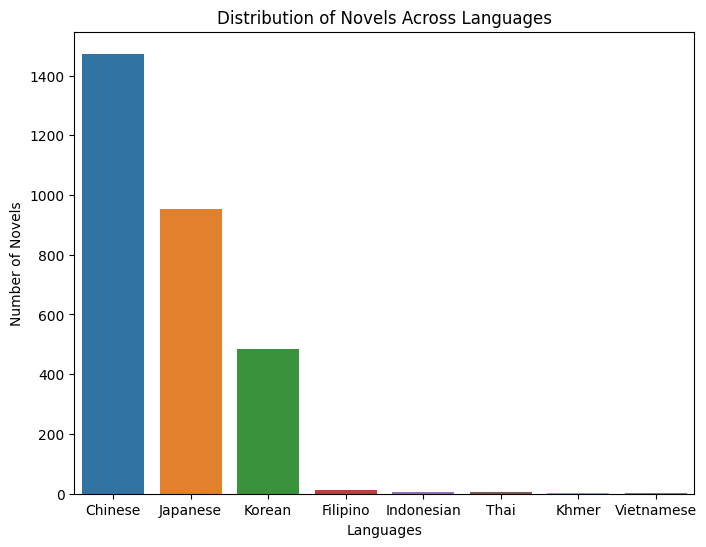

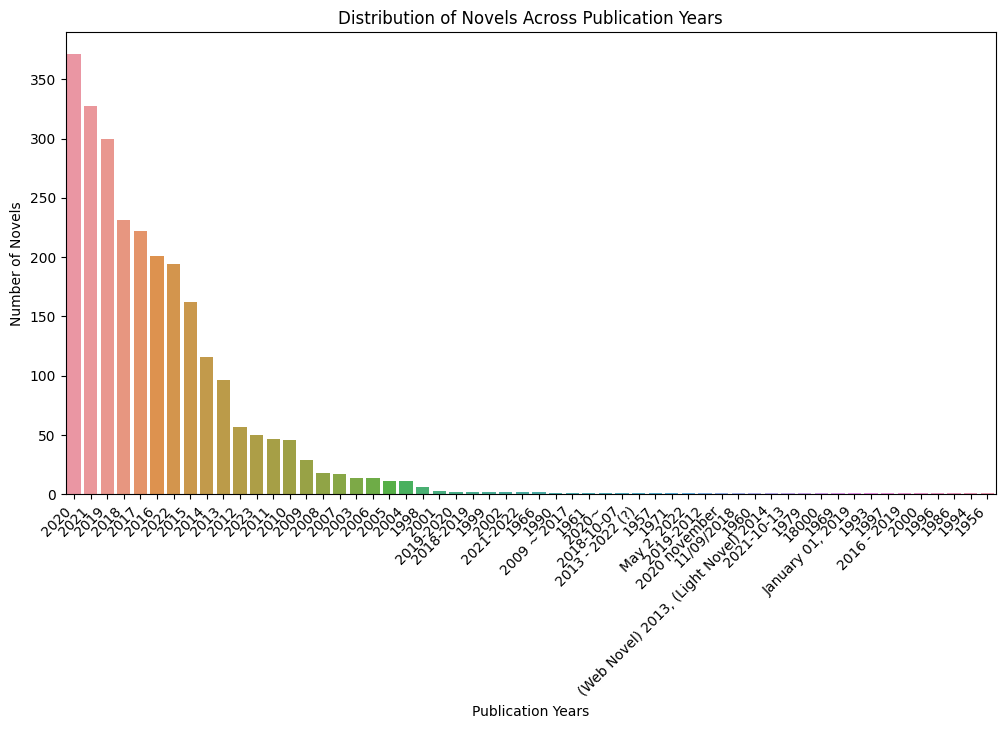

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for languages
plt.figure(figsize=(8, 6))
sns.countplot(x='language', data=novels_data, order=novels_data['language'].value_counts().index)
plt.title('Distribution of Novels Across Languages')
plt.xlabel('Languages')
plt.ylabel('Number of Novels')
plt.show()

# Bar chart for publication years
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=novels_data, order=novels_data['year'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Novels Across Publication Years')
plt.xlabel('Publication Years')
plt.ylabel('Number of Novels')
plt.show()

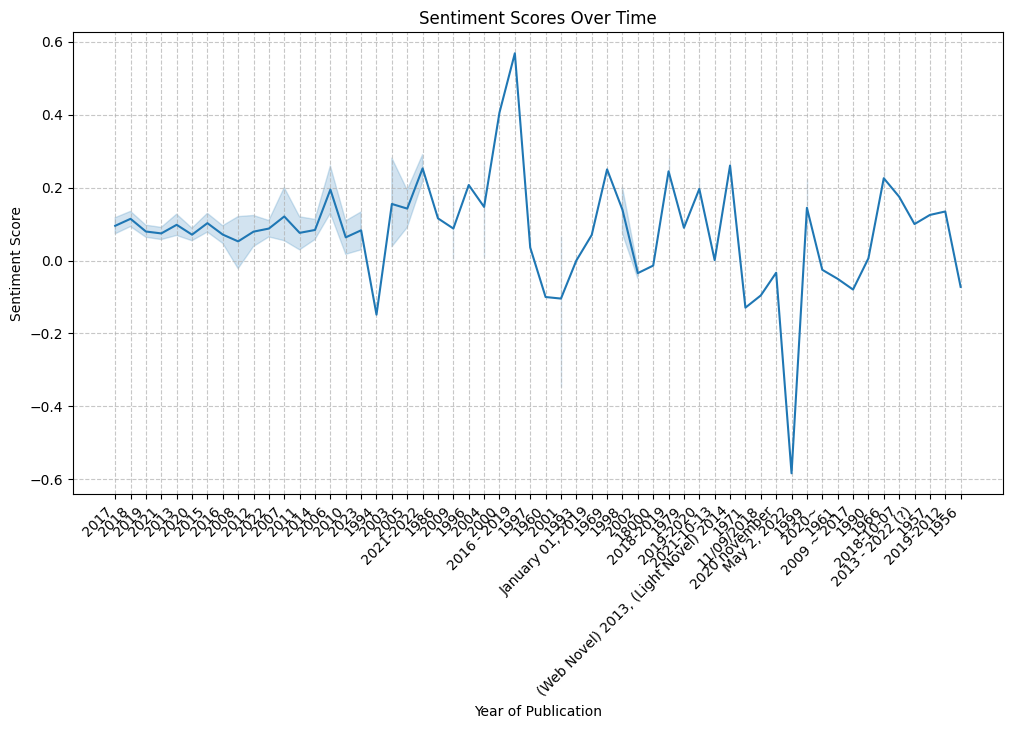

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Plot sentiment scores against the year of publication
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='sentiment', data=novels_data)
plt.xticks(rotation=45, ha='right')
plt.title('Sentiment Scores Over Time')
plt.xlabel('Year of Publication')
plt.ylabel('Sentiment Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
